In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
class LogisticRegressor():
    def __init__(self, learning_rate, iterations):  
        self.learning_rate = learning_rate         
        self.iterations = iterations 

    def fit(self, X, Y):
        self.m, self.n = X.shape  # num of rows = m, num of columns = n
        self.w = np.zeros(self.n)  # initializes the weights to a 0 vector of size n
        self.b = 0  # initializes bias to 0
        self.X = X         
        self.Y = Y 

        for i in range(self.iterations):             
            self.update_weights()   

    def update_weights(self):
        Y_hat = 1 / (1 + np.exp(-(self.X.dot(self.w) + self.b)))  # sigmoid function

        # derivatives
        dw = (1/self.m) * np.dot(self.X.T, (Y_hat - self.Y))
        db = (1/self.m) * np.sum(Y_hat - self.Y)

        # updating the weights & bias using gradient descent
        self.w = self.w - self.learning_rate * dw
        self.b = self.b - self.learning_rate * db

    def predict(self, X):
        Y_pred = 1 / (1 + np.exp(-(X.dot(self.w) + self.b)))
        Y_pred = np.where(Y_pred > 0.5, 1, 0)
        return Y_pred


In [3]:
# generating random dataset
from sklearn.datasets import make_classification

X, y = make_classification(n_samples=100,   
                           n_features=2,    
                           n_informative=2, 
                           n_redundant=0,   
                           n_clusters_per_class=1,
                           random_state=42)

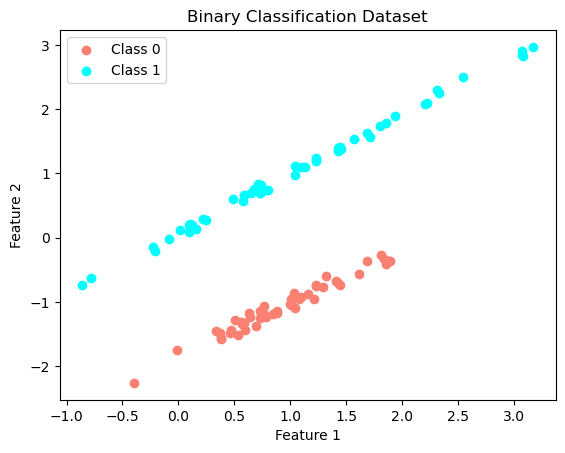

In [4]:
# visualizing dataset
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color='salmon', label='Class 0')
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='cyan', label='Class 1')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Binary Classification Dataset')
plt.legend()
plt.show()

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [6]:
# training my model
model = LogisticRegressor(learning_rate = 0.05, iterations = 1000) #learning rate 0.05 daje 100%acc
model.fit(X_train, y_train)  

y_pred = model.predict(X_test)  

In [7]:
# training sklearn model to compare
from sklearn.linear_model import LogisticRegression

model_sk = LogisticRegression()
model_sk.fit(X_train, y_train)

y_pred_sk = model_sk.predict(X_test)

In [8]:
# comparing
from sklearn.metrics import accuracy_score

accuracy_mine = accuracy_score(y_test, y_pred)
accuracy_sk = accuracy_score(y_test, y_pred_sk)
print(f'My model accuracy: {accuracy_mine:.2f}, Sklearn model accuracy: {accuracy_sk:.2f}')


My model accuracy: 1.00, Sklearn model accuracy: 1.00


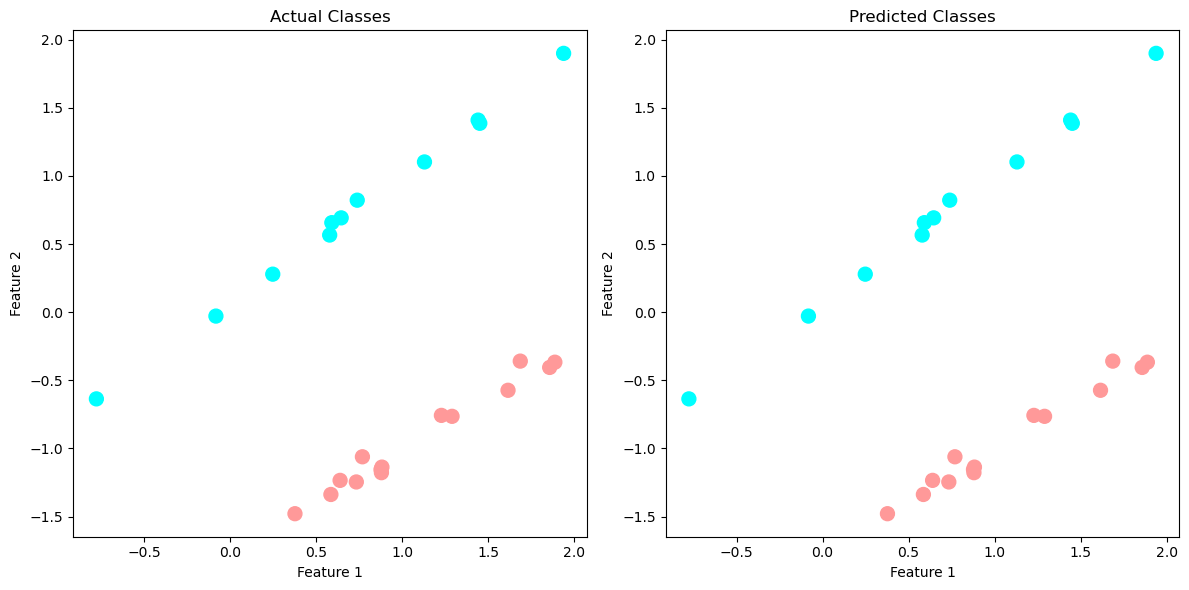

In [9]:
from matplotlib.colors import ListedColormap
custom_cmap = ListedColormap(['#FF9999', '#00FFFF'])


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Plot for actual classes with custom colormap
ax1.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=custom_cmap, s=100)
ax1.set_title('Actual Classes')
ax1.set_xlabel('Feature 1')
ax1.set_ylabel('Feature 2')

# Plot for predicted classes with custom colormap
ax2.scatter(X_test[:, 0], X_test[:, 1], c=y_pred, cmap=custom_cmap, s=100)
ax2.set_title('Predicted Classes')
ax2.set_xlabel('Feature 1')
ax2.set_ylabel('Feature 2')

# Show the plots
plt.tight_layout()
plt.show()

In [10]:
from sklearn.datasets import make_classification

X_2, y_2 = make_classification(n_samples=1000,   
                           n_features=2,    
                           n_informative=2, 
                           n_redundant=0,   
                           n_clusters_per_class=1,
                           random_state=3)

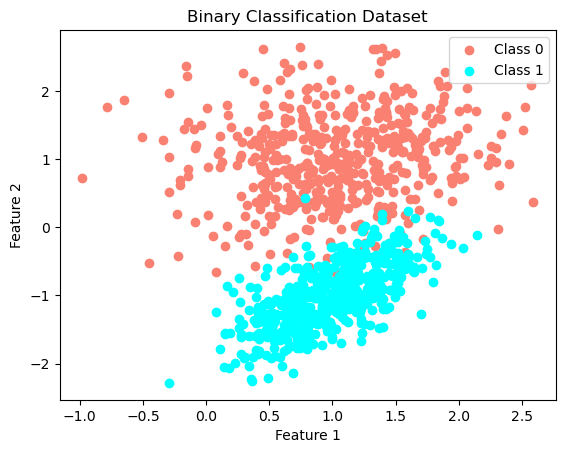

In [18]:
# visualizing dataset
plt.scatter(X_2[y_2 == 0][:, 0], X_2[y_2 == 0][:, 1], color='salmon', label='Class 0')
plt.scatter(X_2[y_2 == 1][:, 0], X_2[y_2 == 1][:, 1], color='cyan', label='Class 1')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Binary Classification Dataset')
plt.legend()
plt.show()

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X_2, y_2, test_size=0.25, random_state=42)

In [13]:
model = LogisticRegressor(learning_rate = 0.5, iterations = 1000) #learning rate 0.5 daje najlepsze accuracy
model.fit(X_train, y_train)  

y_pred = model.predict(X_test)  

In [14]:
model_sk = LogisticRegression()
model_sk.fit(X_train, y_train)

y_pred_sk = model_sk.predict(X_test)

In [15]:
accuracy_mine = accuracy_score(y_test, y_pred)
accuracy_sk = accuracy_score(y_test, y_pred_sk)
print(f'My model accuracy: {accuracy_mine:.2f}, Sklearn model accuracy: {accuracy_sk:.2f}')

My model accuracy: 0.97, Sklearn model accuracy: 0.97


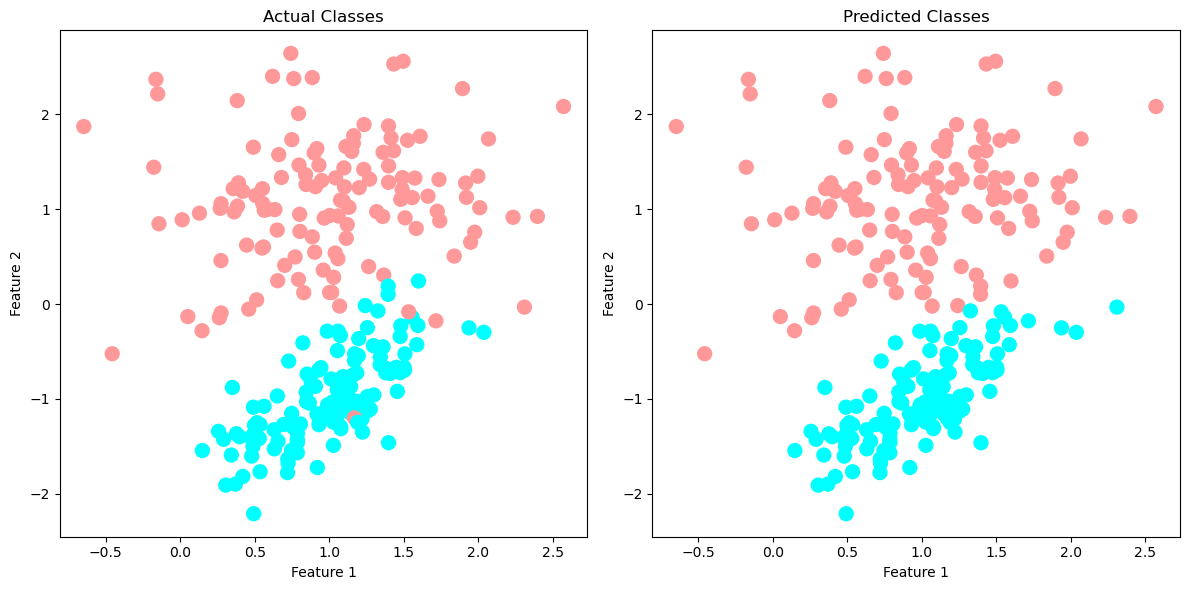

In [16]:
custom_cmap = ListedColormap(['#FF9999', '#00FFFF'])


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Plot for actual classes with custom colormap
ax1.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=custom_cmap, s=100)
ax1.set_title('Actual Classes')
ax1.set_xlabel('Feature 1')
ax1.set_ylabel('Feature 2')

# Plot for predicted classes with custom colormap
ax2.scatter(X_test[:, 0], X_test[:, 1], c=y_pred, cmap=custom_cmap, s=100)
ax2.set_title('Predicted Classes')
ax2.set_xlabel('Feature 1')
ax2.set_ylabel('Feature 2')

# Show the plots
plt.tight_layout()
plt.show()